In [1]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
#generating points from given condition
t=np.zeros((21,2))
t.shape
for i in range(21):
    x_i=-2+0.2*i
    x_j=-2+0.2*i
    t[i,0]=x_i
    t[i,1]=x_j

In [3]:
# As a training set, use 441 randomly sampled data points
data_rand=np.zeros((441,3))
for i in range(441):
    out=0
    x_i=random.choice(t[:,0])
    x_j=random.choice(t[:,1])
    k_val=x_i*x_i+x_j*x_j
    if k_val<=1:
        out=+1
    elif k_val>1:
        out=-1
    data_rand[i,0]=x_i
    data_rand[i,1]=x_j
    data_rand[i,2]=out

In [4]:
#dataframe conversion for plotting the data

data=pd.DataFrame(data_rand,columns=['x_i','x_j','target'])
data

,x_i,x_j,target
0,1.8,1.0,-1.0
1,1.2,-2.0,-1.0
2,0.6,-1.2,-1.0
3,0.2,1.4,-1.0
4,0.8,1.4,-1.0
...,...,...,...
436,1.0,1.0,-1.0
437,2.0,-0.8,-1.0
438,0.6,-2.0,-1.0
439,1.2,1.4,-1.0


In [5]:
# import seaborn as sns
# sns.scatterplot(x='x_i',y='x_j', hue='target',data=data, palette=["C0", "C2"])
#commented because the TA warned about seaborn use

In [6]:
#train test split in the ratio 8:2
train_data=data.iloc[:352,:]
test_data=data.iloc[352:,:]

In [7]:
#checking the ratio of positive and negative target in train and test set
# to make sure dataset is balacnced
def data_ratio_check(x):
    pos = 0
    neg = 0
    for i in range(len(x)):
        if x.iloc[i, 2] == 1:
            pos = pos + 1
        elif x.iloc[i, 2] == -1:
            neg = neg + 1
    print('positive data points ',pos)
    print('negative data points',neg)
    print('Ratio ',neg/pos)
    return neg/pos

In [8]:
#checking the ratio of positive and negative target in traindata
train_data_ratio=data_ratio_check(train_data)
train_data_ratio

positive data points  65
negative data points 287
Ratio  4.415384615384616


4.415384615384616

In [9]:
#checking the ratio of positive and negative target in test data
test_data_ratio=data_ratio_check(test_data)
test_data_ratio

positive data points  21
negative data points 68
Ratio  3.238095238095238


3.238095238095238

In [10]:
#Xtrain & ytrain
X_train=train_data[['x_i','x_j']].values
y_train=train_data[['target']].values

In [11]:
# Xtest and ytest
X_test=test_data[['x_i','x_j']].values
y_test=test_data[['target']].values

In [12]:
#finding the distance between the center of the radial funciton and inputs
def dist(inp,hidden):
    out_arr=np.zeros((1,len(inp)))
    for i in range(len(hidden)):
        val=np.linalg.norm(inp-hidden[i,],axis=1)
        out_arr=np.vstack([out_arr,val])
    out=out_arr[1:,]
    return out

In [13]:
# finding the gaussian function given distance and spread
def rbf(x, s):
    return np.exp(-1 / (2 * s**2) * (x)**2)

In [14]:
#defining sigmoid funciton
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
#targer from -1 has been converted to 0 since I am using sigmoid function at output layer
def label_conv(x):
    for i in range(len(x)):
        if x[i, 0] == -1:
            x[i, 0] = 0
    return x

In [16]:
#forwad pass function
def fwd(test,centers,weights,bias,sif):
    inp_dist=dist(test,centers)
    test=rbf(inp_dist,sif)
    pred = np.dot(test.T, weights) + bias
    pred=sigmoid(pred)
    pred=np.round(pred)
    return pred

In [17]:
# funcition for finding out the accuracy
def acc(y_prediction,y):
    acc=0
    for i in range(len(y_prediction)):
        if y_prediction[i,0]==y[i,0]:
            acc=acc+1
    return (acc/len(y_prediction))*100

In [18]:
# converting the labels of y train
labels=label_conv(y_train)
# labels

## Design of RBF NN based on Gaussian kernel functions with constant spread function(0.8) and using all the points in the training set as centers of the RB functions

In [19]:
#random weight generation
weights = np.random.randn(352,1)#  Weight initialization
bias = np.random.randn(1) # Bias initialization
lr = 0.04 #learning rate

In [20]:
for epoch in range(200):
        inp_dist=dist(X_train,X_train)# calculating distance from hidden layer neurons
        feature_set=rbf(inp_dist,0.8)#passing it to the rbf function

        # FeedForward
        fw_pass = np.dot(feature_set, weights) + bias
        z = sigmoid(fw_pass)
        # Error calculation
        error = z - labels
        e1=(z-labels)*(z-labels)
        # Backpropagation
        weights -= lr * np.dot(feature_set.T, error)
        for num in error:
            bias -= lr * num

        #Accuracy calculation using the test datset
        y_pred=fwd(X_test,X_train,weights,bias,0.8)
        a1=acc(y_pred,label_conv(y_test))
        if epoch%50==0:
            print('Epoch num :',epoch,' Spread value ',0.8,' Error :',(e1.sum())/352,' Accuracy :',a1)

Epoch num : 0  Spread value  0.8  Error : 0.45944063034621935  Accuracy : 76.40449438202246
Epoch num : 50  Spread value  0.8  Error : 0.009822246363082578  Accuracy : 96.62921348314607
Epoch num : 100  Spread value  0.8  Error : 0.009069720187983476  Accuracy : 98.87640449438202
Epoch num : 150  Spread value  0.8  Error : 0.008344615982844814  Accuracy : 98.87640449438202


## Design of RBF NN based on Gaussian kernel functions with varing spread function(0.3, 0.8, 1.3) and using all the points in the training set as centers of the RB functions

In [21]:
sp=[.3,.8,1.3]#varying spread
store=np.zeros((3,200))#storing the loss
store_acc=np.zeros((3,200))#storing the accuracy
z1=-1
for i in sp:#for each spread we calculate the loss and accuracy
    z1=z1+1
    weights = np.random.randn(352,1)# Weight initialization
    bias = np.random.randn(1)# Bias initialization
    for epoch in range(200):
        inp_dist=dist(X_train,X_train)# calculating distance from hidden layer neurons to input
        feature_set=rbf(inp_dist,i)#passing it to the rbf function

        # FeedForward
        fw_pass = np.dot(feature_set, weights) + bias
        z = sigmoid(fw_pass)
        # Error calculation
        error = z - labels
        e1=(z-labels)*(z-labels)
        # Backpropagation
        weights -= lr * np.dot(feature_set.T, error)
        # print(z_delta,'z_delta')
        for num in error:
            bias -= lr * num

        #Accuracy calculation using the test datset
        y_pred=fwd(X_test,X_train,weights,bias,i)
        a1=acc(y_pred,label_conv(y_test))
        if epoch%50==0:
            print('Epoch num :',epoch,' Spread value ',i,' Error :',(e1.sum())/352,' Accuracy :',a1)
        #storing loss and accuracy
        store[int(z1),epoch]=(e1.sum())/352
        store_acc[int(z1),epoch]=a1

Epoch num : 0  Spread value  0.3  Error : 0.4013192315508032  Accuracy : 78.65168539325843
Epoch num : 50  Spread value  0.3  Error : 0.006223648820718201  Accuracy : 97.75280898876404
Epoch num : 100  Spread value  0.3  Error : 0.004822427373709421  Accuracy : 97.75280898876404
Epoch num : 150  Spread value  0.3  Error : 0.004024419235038876  Accuracy : 97.75280898876404
Epoch num : 0  Spread value  0.8  Error : 0.6759026955962497  Accuracy : 76.40449438202246
Epoch num : 50  Spread value  0.8  Error : 0.008156415920233851  Accuracy : 96.62921348314607
Epoch num : 100  Spread value  0.8  Error : 0.00904811344638769  Accuracy : 96.62921348314607
Epoch num : 150  Spread value  0.8  Error : 0.008596336803096096  Accuracy : 96.62921348314607
Epoch num : 0  Spread value  1.3  Error : 0.6149221336451739  Accuracy : 76.40449438202246
Epoch num : 50  Spread value  1.3  Error : 0.07786040041890256  Accuracy : 92.13483146067416
Epoch num : 100  Spread value  1.3  Error : 0.01330318962881387  Ac

In [22]:
#Dataframe conversion
import matplotlib.pyplot as plt
store_df=pd.DataFrame(store.T,columns=['Spread =0.3','Spread =0.8','Spread =1.3'])
store_acc_df=pd.DataFrame(store_acc.T,columns=['Accuracy for Spread =0.3','Accuracy for Spread =0.8','Accuracy for Spread =1.3'])

Text(0, 0.5, 'Mean square error')

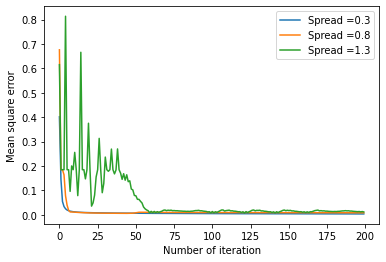

In [23]:
#Plotting loss vs iterations
store_df.plot.line()
plt.xlabel('Number of iteration')
plt.ylabel('Mean square error')

Text(0, 0.5, 'Accuracy')

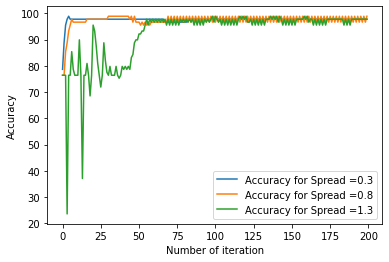

In [24]:
store_acc_df.plot.line()
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')

### Compare the performance results (mean square error)
From the figure, we can see that mean square error is decreasing differently for different spread parameter. For spread = 0.8, the loss is decreasing very fast with each iteration. While for spread = 1.2 it took around 90 iterations to reach the error value of other two spread parameters. We want to reduce the error value as fast as possible since it reduces the training time. So, for spread =0.8, we got best performance in terms of the rate of error value reduction. Spread = 0.3 is giving the second best performance and spread = 1.3 gave the worst performance. Besides, from the figure we can see that a lot of fluctuation of error value in case of spread = 1.3 compared to other two.

## Design of the RBF NN, using this time only 150 centers, Randomly select the centers from the input data

In [25]:
# Randomly selecting 150 centers
data_rand_new=np.zeros((150,3))
for i in range(150):
    out=0
    x_i=random.choice(t[:,0])
    x_j=random.choice(t[:,1])
    k_val=x_i*x_i+x_j*x_j
    if k_val<=1:
        out=+1
    elif k_val>1:
        out=-1
    data_rand_new[i,0]=x_i
    data_rand_new[i,1]=x_j
    data_rand_new[i,2]=out

In [26]:
#Randomly selected centers from the input data
hidden_1=data_rand_new[:,0:2]

In [27]:
#randomly selected center points
# hidden_1

In [28]:
sp=[.4,.8,1.2]#varying spread
store=np.zeros((3,200))#storing the loss
store_acc=np.zeros((3,200))#storing the accuracy
z1=-1
for i in sp:#for each spread we calculate the loss and accuracy
    z1=z1+1
    weights = np.random.randn(150,1)# Weight initialization
    bias = np.random.randn(1)# Bias initialization
    for epoch in range(200):
        inp_dist=dist(X_train,hidden_1)# calculating distance from hidden layer neurons to input
        feature_set=rbf(inp_dist,i)#passing it to the rbf function

        #Feedforward
        fw_pass = np.dot(feature_set.T, weights) + bias
        z = sigmoid(fw_pass)


        # Error calculation
        error = z - labels
        e1=np.abs(z-labels)

        # Backpropagation
        weights -= lr * np.dot(feature_set, error)
        # print(z_delta,'z_delta')
        for num in error:
            bias -= lr * num

        #acc
        y_pred=fwd(X_test,hidden_1,weights,bias,i)
        a1=acc(y_pred,label_conv(y_test))
        if epoch%50==0:
            print('Epoch num :',epoch,' Spread value ',i,' Error :',(e1.sum())/352,' Accuracy :',a1)
        store[int(z1),epoch]=(e1.sum())/352
        store_acc[int(z1),epoch]=a1

Epoch num : 0  Spread value  0.4  Error : 0.3857117685423349  Accuracy : 85.39325842696628
Epoch num : 50  Spread value  0.4  Error : 0.02736467413420118  Accuracy : 97.75280898876404
Epoch num : 100  Spread value  0.4  Error : 0.022245073556299847  Accuracy : 97.75280898876404
Epoch num : 150  Spread value  0.4  Error : 0.019935658994257092  Accuracy : 97.75280898876404
Epoch num : 0  Spread value  0.8  Error : 0.7969191593758289  Accuracy : 76.40449438202246
Epoch num : 50  Spread value  0.8  Error : 0.01860533555765985  Accuracy : 97.75280898876404
Epoch num : 100  Spread value  0.8  Error : 0.017371255487114403  Accuracy : 97.75280898876404
Epoch num : 150  Spread value  0.8  Error : 0.016610706083022155  Accuracy : 97.75280898876404
Epoch num : 0  Spread value  1.2  Error : 0.595450379560528  Accuracy : 76.40449438202246
Epoch num : 50  Spread value  1.2  Error : 0.01688018499328557  Accuracy : 97.75280898876404
Epoch num : 100  Spread value  1.2  Error : 0.016829808501724244  Acc

In [29]:
store_df=pd.DataFrame(store.T,columns=['Spread =0.3','Spread =0.8','Spread =1.3'])
store_acc_df=pd.DataFrame(store_acc.T,columns=['Accuracy for Spread =0.3','Accuracy for Spread =0.8','Accuracy for Spread =1.3'])

Text(0, 0.5, 'Mean square error')

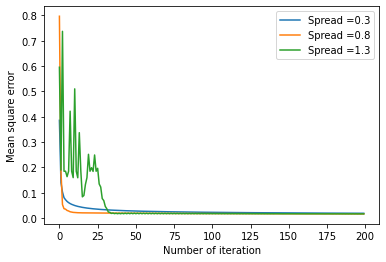

In [30]:
store_df.plot.line()
plt.xlabel('Number of iteration')
plt.ylabel('Mean square error')

Text(0, 0.5, 'Accuracy')

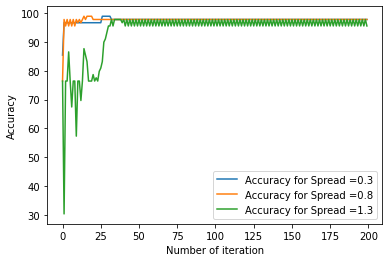

In [31]:
store_acc_df.plot.line()
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')

## Design of the RBF NN, using  only 150 centers  by K-Means algorithm to find the centers

In [32]:
#finding out the kmeans center
from sklearn.cluster import KMeans
km=KMeans(n_clusters=150)
km.fit(X_train)
K_cent=km.cluster_centers_

In [33]:
#kmeans centers
# print(km.cluster_centers_)

In [34]:
sp=[.3,.8,1.3]#varying spread
store=np.zeros((3,200))#storing the loss
store_acc=np.zeros((3,200))#storing the accuracy
z1=-1
for i in sp:
    z1=z1+1
    weights = np.random.randn(150,1)# Weight initialization
    bias = np.random.randn(1)# Bias initialization
    for epoch in range(200):
        inp_dist=dist(X_train,K_cent)# calculating distance from hidden layer neurons to input
        feature_set=rbf(inp_dist,i)#passing it to the rbf function

        # Forwardpropagation
        fw_pass = np.dot(feature_set.T, weights) + bias
        z = sigmoid(fw_pass)
        #error calculation
        error = z - labels
        e1=np.abs(z-labels)
        # backpropagation step 2
        weights -= lr * np.dot(feature_set, error)
        # print(z_delta,'z_delta')
        for num in error:
            bias -= lr * num

        #accuracy
        y_pred=fwd(X_test,K_cent,weights,bias,i)
        a1=acc(y_pred,label_conv(y_test))
        if epoch%50==0:
            print('Epoch num :',epoch,' Spread value ',i,' Error :',(e1.sum())/352,' Accuracy :',a1)

        store[int(z1),epoch]=(e1.sum())/352
        store_acc[int(z1),epoch]=a1

Epoch num : 0  Spread value  0.3  Error : 0.279338236905609  Accuracy : 84.26966292134831
Epoch num : 50  Spread value  0.3  Error : 0.03454604532198109  Accuracy : 95.50561797752809
Epoch num : 100  Spread value  0.3  Error : 0.02606325112690595  Accuracy : 95.50561797752809
Epoch num : 150  Spread value  0.3  Error : 0.022377589894646086  Accuracy : 94.3820224719101
Epoch num : 0  Spread value  0.8  Error : 0.36795773953853916  Accuracy : 71.91011235955057
Epoch num : 50  Spread value  0.8  Error : 0.017420387792458747  Accuracy : 97.75280898876404
Epoch num : 100  Spread value  0.8  Error : 0.016709983039569973  Accuracy : 98.87640449438202
Epoch num : 150  Spread value  0.8  Error : 0.01622034035155913  Accuracy : 98.87640449438202
Epoch num : 0  Spread value  1.3  Error : 0.2542135017432781  Accuracy : 23.595505617977526
Epoch num : 50  Spread value  1.3  Error : 0.015835255529918855  Accuracy : 97.75280898876404
Epoch num : 100  Spread value  1.3  Error : 0.015807365735162084  Ac

In [35]:
store_df=pd.DataFrame(store.T,columns=['Spread =0.3','Spread =0.8','Spread =1.3'])
store_acc_df=pd.DataFrame(store_acc.T,columns=['Accuracy for Spread =0.3','Accuracy for Spread =0.8','Accuracy for Spread =1.3'])

Text(0, 0.5, 'Mean square error')

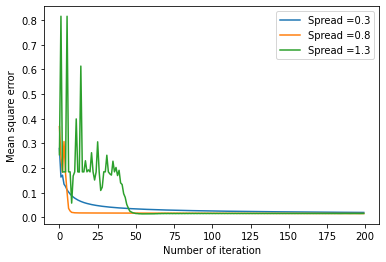

In [36]:
store_df.plot.line()
plt.xlabel('Number of iteration')
plt.ylabel('Mean square error')

Text(0, 0.5, 'Accuracy')

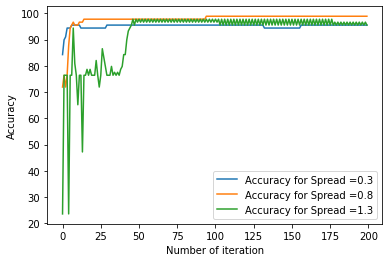

In [37]:
store_acc_df.plot.line()
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')

## Comparison of network performance between Question 3.1 and Question 3.2 for spread = 0.8
### Accuracy of various networks
<ul>
<li>Network(1) with 352 points in the training set as centers of the RB function has an accuracy of 98.875% after 200 epochs</li>
<li>Network(2) with 150 points as centers of the RB function (Radomly selected) has an accuracy of 98.875% after 200 epochs  </li>
<li>Network(3) with 150 points as centers of the RB function (selected by kmeans) has an accuracy of 98.875% after 200 epochs</li>
</ul>
Since all of the three processes are giving the same accuracy after 200 epochs, we tried to find out which of these three processes is giving highest accuracy with less number of epochs.

### Highest accuracy with lowest possible training time

<ul>
<li>Network(1) with 352 points in the training set as centers of the RB function has a stable accuracy of 98.875% after 10 epochs</li>
<li>Network(2) with 150 points as centers of the RB function (Radomly selected) has a stable accuracy of 98.875% after 15 epochs  </li>
<li>Network(3) with 150 points as centers of the RB function (selected by kmeans) has a stable accuracy of 98.875% after 9 epochs</li>
</ul>

So, from the above discussion we can say that network(3) is giving the best perfomance interms of accuracy taking the lowest possible training time.